# Imports

In [1]:
import numpy as np
import scipy.stats as scs
import matplotlib.pyplot as plt

%matplotlib inline

# Generate data

In [2]:
xs = np.arange(10)
noise = scs.norm(0, 3).rvs(10)
ys = 7 * xs + noise

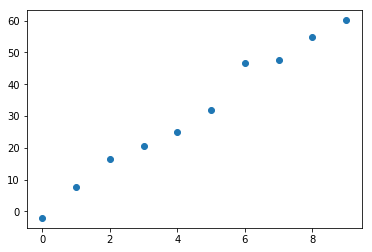

In [3]:
plt.scatter(xs, ys)
plt.show()

# Functions

In [4]:
def predict(xs, b1):
    return b1 * xs

In [5]:
def loss(ys, yhs):
    return (ys - yhs) ** 2

In [6]:
def slope(ys, yhs, xs):
    return -2 * xs * (ys - yhs)

# Loss as function of $ \beta $

In [7]:
betas = list(range(3, 12))
losses = [loss(ys, predict(xs, b)) for b in betas]

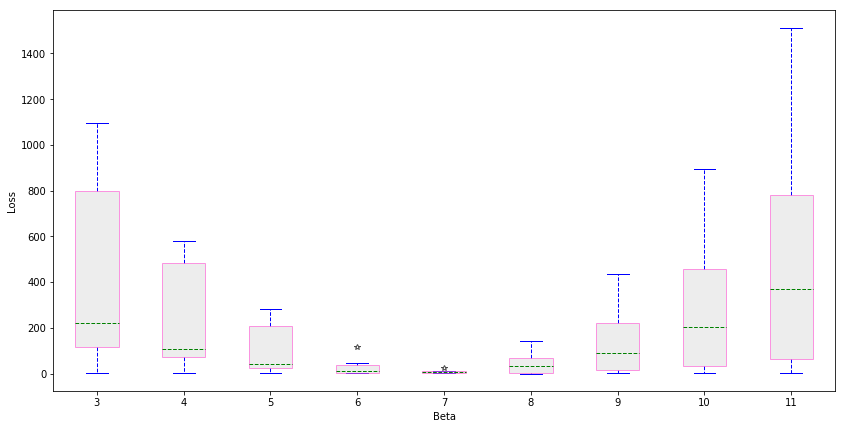

In [8]:
fig = plt.figure(figsize=(14, 7))
ax = fig.add_subplot(111)
bp = ax.boxplot(losses, patch_artist=True)
for box in bp['boxes']:
    box.set(color='#ff33cc', linewidth=1)
    box.set(facecolor='#dddddd', alpha=0.5)
for whisker in bp['whiskers']:
    whisker.set(color='blue', linewidth=1, linestyle='--')
for cap in bp['caps']:
    cap.set(color='blue', linewidth=1)
for median in bp['medians']:
    median.set(color='green', linewidth=1, linestyle='--')
for flier in bp['fliers']:
    flier.set(color='black', marker='*', alpha=0.7)
ax.set_xticklabels(betas)
ax.set_xlabel('Beta')
ax.set_ylabel('Loss')
plt.show()

# Slope as a function of $ \beta $

In [9]:
derivitives = [slope(ys, predict(xs, b), xs) for b in betas]

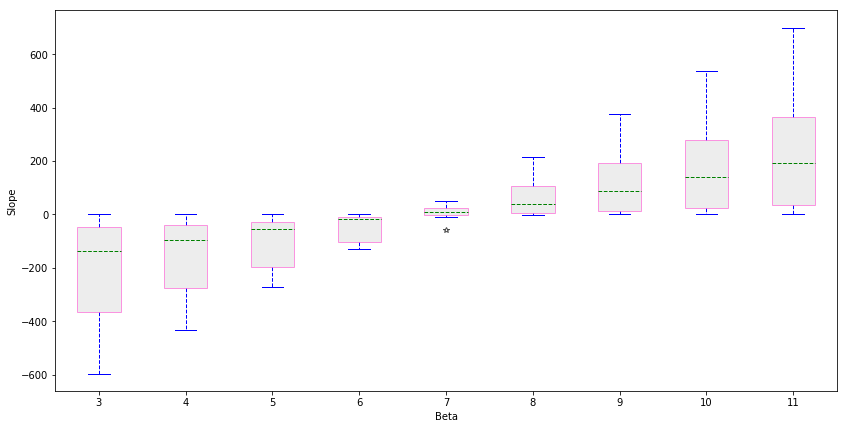

In [10]:
fig = plt.figure(figsize=(14, 7))
ax = fig.add_subplot(111)
bp = ax.boxplot(derivitives, patch_artist=True)
for box in bp['boxes']:
    box.set(color='#ff33cc', linewidth=1)
    box.set(facecolor='#dddddd', alpha=0.5)
for whisker in bp['whiskers']:
    whisker.set(color='blue', linewidth=1, linestyle='--')
for cap in bp['caps']:
    cap.set(color='blue', linewidth=1)
for median in bp['medians']:
    median.set(color='green', linewidth=1, linestyle='--')
for flier in bp['fliers']:
    flier.set(color='black', marker='*', alpha=0.7)
ax.set_xticklabels(betas)
ax.set_xlabel('Beta')
ax.set_ylabel('Slope')
plt.show()

# Gradient descent

In [11]:
b1 = -9
alpha = 0.001

mses = []

for i in range(100):
    mse = loss(ys, predict(xs, b1)).mean()
    b1_g = slope(ys, predict(xs, b1), xs).mean()
    b1_d = alpha * b1_g
    b1 -= b1_d

    mses.append(mse)

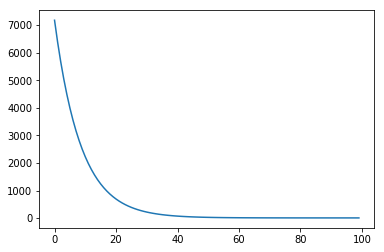

In [12]:
plt.plot(range(100), mses)
plt.show()

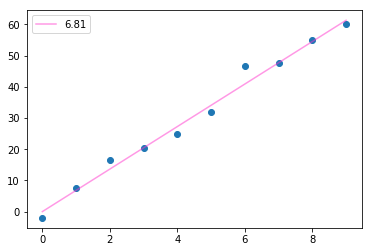

In [13]:
plt.scatter(xs, ys)
plt.plot(xs, b1 * xs, color='#ff33cc', alpha=0.5, label="{0:.2f}".format(b1))
plt.legend()
plt.show()

# Q.E.D.